In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Input,Dense,LSTM,GRU,SimpleRNN, Flatten,GlobalMaxPool2D,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam



In [0]:
#Load the data
mnist = tf.keras.datasets.mnist
#reuters = tf.keras.datasets.reuters

In [0]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [49]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [27]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


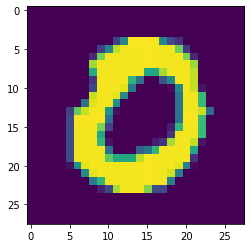

In [31]:
plt.imshow(x_train[np.random.randint(0,60000)])

In [43]:
x_test.shape

(10000, 28, 28)

In [0]:
N = x_train.shape[0]
T = x_train.shape[1]
D=x_train.shape[2]
M = 30
K =10

In [63]:
print('N:',N,'\nT:',T,'\nD:',D,'\nM:',M,'\nK:',K)

N: 60000 
T: 28 
D: 28 
M: 30 
K: 10


In [0]:
#Build Model
i = Input(shape=(T,D))
x = LSTM(M)(i)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [55]:
#Train model
r = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=15,
)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9809 - accuracy: 0.6680 - val_loss: 0.6316 - val_accuracy: 0.7905
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5624 - accuracy: 0.8118 - val_loss: 0.5088 - val_accuracy: 0.8306
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4800 - accuracy: 0.8390 - val_loss: 0.4474 - val_accuracy: 0.8498
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4373 - accuracy: 0.8518 - val_loss: 0.4313 - val_accuracy: 0.8536
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4096 - accuracy: 0.8598 - val_loss: 0.4096 - val_accuracy: 0.8600
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3874 - accuracy: 0.8684 - val_loss: 0.3947 - val_accuracy: 0.8631
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3748 - accuracy: 0.8728 - val_loss: 0.3835 - val_accuracy:

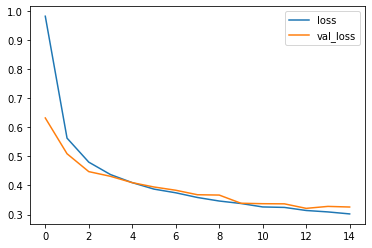

In [58]:
#plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

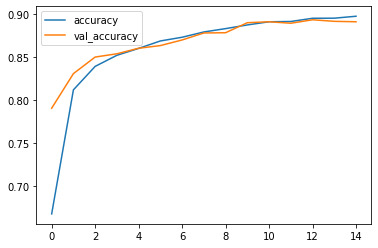

In [60]:
#plot loss
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [0]:
# model improved with return_sequece and GlobalMaxPool2D
i = Input(shape=(T,D))
x = LSTM(M,return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

#Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [74]:
r = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=50
)

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2133 - accuracy: 0.6376 - val_loss: 0.7629 - val_accuracy: 0.7669
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6426 - accuracy: 0.8006 - val_loss: 0.5621 - val_accuracy: 0.8241
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5090 - accuracy: 0.8376 - val_loss: 0.4750 - val_accuracy: 0.8509
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4521 - accuracy: 0.8546 - val_loss: 0.4216 - val_accuracy: 0.8620
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4048 - accuracy: 0.8692 - val_loss: 0.3911 - val_accuracy: 0.8763
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3744 - accuracy: 0.8793 - val_loss: 0.3691 - val_accuracy: 0.8847
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3516 - accuracy: 0.8888 - val_loss: 0.3619 - val_accuracy:

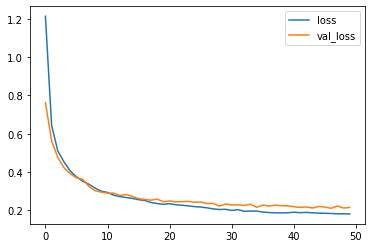

In [75]:
#plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

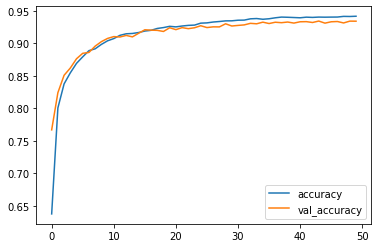

In [76]:
#plot loss
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 948    0    3    2    2    2    8    1   14    0]
 [   0 1118    7    2    2    1    2    1    2    0]
 [   6    2  963   32    6    6    3    1    9    4]
 [   0    0   22  942    1   30    0    9    3    3]
 [   5    7    5    0  903    3    4   10    9   36]
 [   3    0    3   37    2  813    6    3   17    8]
 [  10    3    8    1    3    7  918    0    8    0]
 [   0    9    4    9   13    5    0  966    1   21]
 [  52    1    6    5    2   27   16    0  850   15]
 [   1    3    6   14   31    1    0   25    8  920]]


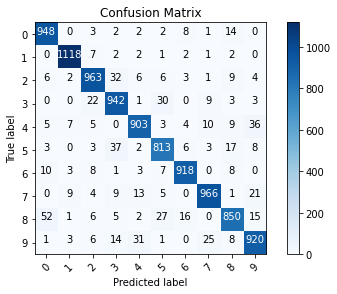

In [77]:
#Plot confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True.
  """

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print ('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment='center',
             color ='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
p_test2 = model.predict(x_test)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [78]:
p_test

array([7, 2, 1, ..., 4, 5, 6])

Text(0.5, 1.0, 'True Label: 7    Predicted: 3')

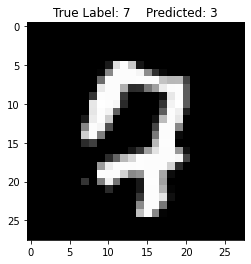

In [91]:
#Show miscalssified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True Label: %d    Predicted: %d' % (y_test[i], p_test[i]))